# 6-Pipeline

- **Goal:** Prediction Recognition

- **Purpose:** To implement full pipeline from generation synthetic data to model predictions and metrics.

- **Misc:**

In [1]:
import os
import sys

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

from data_processing import DataProcessing
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction
from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

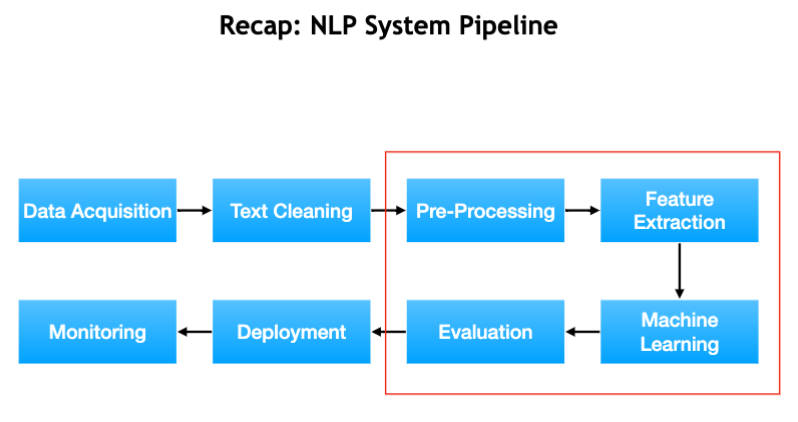

In [2]:
Image(filename='../misc/base_pipeline.png')

## 1-Data Acquisition

- Only using the `%store -r` to shorten process for now. Will eventually place here or files

In [3]:
# %store -r updated_predictions_df
# %store -r updated_non_predictions_df

pd.set_option('max_colwidth', 800)

In [4]:
# updated_predictions_df

In [5]:
# updated_non_predictions_df

In [6]:
predictions_base_df = pd.read_csv('../data/two_models-predictions.csv')
predictions_base_df

Base Sentence  \
0                                         T1: On 2024-08-21, Emily Davis, a financial reporter, predicts that the revenue at Amazon will likely increase from $400 billion to $450 billion in 2028 Q2.   
1                                                          T2: In Q2 2026, Julian Hall from Yahoo Finance, envisions that the stock price at Tesla will rise from $800 to $1,200 per share in 2029 Q4.   
2                                     T3: Dija Gabe, a financial expert, predicts on 23 October 2024 that the research and development expenses at Alphabet may stay stable at $30 million in 2027 Q3.   
3                                         T4: According to a top executive from Microsoft, on 08/21/2024, the operating income is expected to increase beyond $10 million in the timeframe of 2029 Q2.   
4                                       T5: In 2025-08-21, the net profit at Facebook has a probability of 8 percent to reach $35 billion, as predicted by Ava Lee, a financial analyst, on 21 Oct 24.   
...                                                                                                                                                                                                ...   
4631                                              T1: On Tuesday, December 17, 2024, Governor Emily Davis predicts that the high school graduation rate in California will increase by 10% in 2026 Q2.   
4632                                                          T2: In 2025, Dr. David Kim from the Federal Reserve predicts that the inflation rate in South Korea will stay stable at 2.5% in 2027 Q1.   
4633                                        T3: Dr. Lisa Nguyen predicts on Wednesday, November 20, 2024, that the number of small businesses in the United States will rise to 33 million in 2029 Q3.   
4634  T4: According to a policy analyst from the International Monetary Fund, on Friday, October 18, 2024, the global GDP growth rate is expected to increase beyond 3.5% in the timeframe of 2028 Q2.   
4635                                            T5: In 2027 Q1, the number of people living in poverty in Brazil will decrease by 20%, as predicted by Dr. Maria Rodriguez on Monday, August 19, 2024.   

      Sentence Label            Model Name   Domain  Batch Index  
0                  1  llama-3.1-8b-instant  finance            0  
1                  1  llama-3.1-8b-instant  finance            0  
2                  1  llama-3.1-8b-instant  finance            0  
3                  1  llama-3.1-8b-instant  finance            0  
4                  1  llama-3.1-8b-instant  finance            0  
...              ...                   ...      ...          ...  
4631               1       llama3-70b-8192   policy           40  
4632               1       llama3-70b-8192   policy           40  
4633               1       llama3-70b-8192   policy           40  
4634               1       llama3-70b-8192   policy           40  
4635               1       llama3-70b-8192   policy           40  

[4636 rows x 5 columns]

In [7]:
non_predictions_base_df = pd.read_csv('../data/two_models-non_predictions.csv')
non_predictions_base_df

Base Sentence  \
0     T0: The artist carefully selected colors for her next painting, inspired by the beauty of nature.   
1       T0: She spent hours in the library researching for her upcoming thesis paper on climate change.   
2                    T0: The sound of the ocean waves was soothing to her ears as she sat on the beach.   
3                               T0: He walked his dog every morning to get some exercise and fresh air.   
4               T0: The smell of freshly baked cookies filled the entire house, making everyone hungry.   
...                                                                                                 ...   
3496                                   T0: The new employee was nervous on his first day at the office.   
3497                                    T0: The smell of freshly baked cookies filled the entire house.   
3498                                         T0: The sound of the ocean waves was soothing to her ears.   
3499                                        T0: The old bookshelf in the attic was dusty and forgotten.   
3500                           T0: The vibrant colors of the painting caught her attention immediately.   

      Sentence Label            Model Name Domain  Batch Index  
0                  0  llama-3.1-8b-instant    any            0  
1                  0  llama-3.1-8b-instant    any            0  
2                  0  llama-3.1-8b-instant    any            0  
3                  0  llama-3.1-8b-instant    any            0  
4                  0  llama-3.1-8b-instant    any            0  
...              ...                   ...    ...          ...  
3496               0       llama3-70b-8192    any           84  
3497               0       llama3-70b-8192    any           84  
3498               0       llama3-70b-8192    any           84  
3499               0       llama3-70b-8192    any           84  
3500               0       llama3-70b-8192    any           84  

[3501 rows x 5 columns]

In [8]:
predictions_base_df = predictions_base_df[:3501]
predictions_base_df

Base Sentence  \
0         T1: On 2024-08-21, Emily Davis, a financial reporter, predicts that the revenue at Amazon will likely increase from $400 billion to $450 billion in 2028 Q2.   
1                          T2: In Q2 2026, Julian Hall from Yahoo Finance, envisions that the stock price at Tesla will rise from $800 to $1,200 per share in 2029 Q4.   
2     T3: Dija Gabe, a financial expert, predicts on 23 October 2024 that the research and development expenses at Alphabet may stay stable at $30 million in 2027 Q3.   
3         T4: According to a top executive from Microsoft, on 08/21/2024, the operating income is expected to increase beyond $10 million in the timeframe of 2029 Q2.   
4       T5: In 2025-08-21, the net profit at Facebook has a probability of 8 percent to reach $35 billion, as predicted by Ava Lee, a financial analyst, on 21 Oct 24.   
...                                                                                                                                                                ...   
3496               T2: In 2024-08-21, David Lee from Goldman Sachs predicts that the operating cash flow at 3M will increase from $2 billion to $5 billion in 2028 Q3.   
3497                         T3: Emily Chen predicts on 21 October 2024 that the research and development expenses at Intel may stay stable at $10 million in 2029 Q1.   
3498   T4: According to a financial expert from Cisco Systems, on 08/21/2024, the gross profit is expected to increase beyond $50 million in the timeframe of 2027 Q4.   
3499                T5: In 2025-08-21, the revenue at Procter & Gamble will likely reach $80 billion, a 10% increase, as predicted by Michael Brown on 21 August 2024.   
3500        T1: On Tuesday, November 19, 2024, Sophia Patel forecasts that the net profit at Coca-Cola will likely decrease from $10 billion to $8 billion in 2026 Q1.   

      Sentence Label            Model Name   Domain  Batch Index  
0                  1  llama-3.1-8b-instant  finance            0  
1                  1  llama-3.1-8b-instant  finance            0  
2                  1  llama-3.1-8b-instant  finance            0  
3                  1  llama-3.1-8b-instant  finance            0  
4                  1  llama-3.1-8b-instant  finance            0  
...              ...                   ...      ...          ...  
3496               1       llama3-70b-8192  finance           29  
3497               1       llama3-70b-8192  finance           29  
3498               1       llama3-70b-8192  finance           29  
3499               1       llama3-70b-8192  finance           29  
3500               1       llama3-70b-8192  finance           29  

[3501 rows x 5 columns]

In [9]:
dfs = [predictions_base_df, non_predictions_base_df]
base_df = DataProcessing.concat_dfs(dfs)
base_df

Base Sentence  \
0         T1: On 2024-08-21, Emily Davis, a financial reporter, predicts that the revenue at Amazon will likely increase from $400 billion to $450 billion in 2028 Q2.   
1                          T2: In Q2 2026, Julian Hall from Yahoo Finance, envisions that the stock price at Tesla will rise from $800 to $1,200 per share in 2029 Q4.   
2     T3: Dija Gabe, a financial expert, predicts on 23 October 2024 that the research and development expenses at Alphabet may stay stable at $30 million in 2027 Q3.   
3         T4: According to a top executive from Microsoft, on 08/21/2024, the operating income is expected to increase beyond $10 million in the timeframe of 2029 Q2.   
4       T5: In 2025-08-21, the net profit at Facebook has a probability of 8 percent to reach $35 billion, as predicted by Ava Lee, a financial analyst, on 21 Oct 24.   
...                                                                                                                                                                ...   
6997                                                                                                  T0: The new employee was nervous on his first day at the office.   
6998                                                                                                   T0: The smell of freshly baked cookies filled the entire house.   
6999                                                                                                        T0: The sound of the ocean waves was soothing to her ears.   
7000                                                                                                       T0: The old bookshelf in the attic was dusty and forgotten.   
7001                                                                                          T0: The vibrant colors of the painting caught her attention immediately.   

      Sentence Label            Model Name   Domain  Batch Index  
0                  1  llama-3.1-8b-instant  finance            0  
1                  1  llama-3.1-8b-instant  finance            0  
2                  1  llama-3.1-8b-instant  finance            0  
3                  1  llama-3.1-8b-instant  finance            0  
4                  1  llama-3.1-8b-instant  finance            0  
...              ...                   ...      ...          ...  
6997               0       llama3-70b-8192      any           84  
6998               0       llama3-70b-8192      any           84  
6999               0       llama3-70b-8192      any           84  
7000               0       llama3-70b-8192      any           84  
7001               0       llama3-70b-8192      any           84  

[7002 rows x 5 columns]

In [10]:
base_df = DataProcessing.reformat_df_with_template_number(base_df, "Base Sentence")
base_df

Base Sentence  \
0         On 2024-08-21, Emily Davis, a financial reporter, predicts that the revenue at Amazon will likely increase from $400 billion to $450 billion in 2028 Q2.   
1                          In Q2 2026, Julian Hall from Yahoo Finance, envisions that the stock price at Tesla will rise from $800 to $1,200 per share in 2029 Q4.   
2     Dija Gabe, a financial expert, predicts on 23 October 2024 that the research and development expenses at Alphabet may stay stable at $30 million in 2027 Q3.   
3         According to a top executive from Microsoft, on 08/21/2024, the operating income is expected to increase beyond $10 million in the timeframe of 2029 Q2.   
4       In 2025-08-21, the net profit at Facebook has a probability of 8 percent to reach $35 billion, as predicted by Ava Lee, a financial analyst, on 21 Oct 24.   
...                                                                                                                                                            ...   
6997                                                                                                  The new employee was nervous on his first day at the office.   
6998                                                                                                   The smell of freshly baked cookies filled the entire house.   
6999                                                                                                        The sound of the ocean waves was soothing to her ears.   
7000                                                                                                       The old bookshelf in the attic was dusty and forgotten.   
7001                                                                                          The vibrant colors of the painting caught her attention immediately.   

      Sentence Label            Model Name   Domain  Batch Index  \
0                  1  llama-3.1-8b-instant  finance            0   
1                  1  llama-3.1-8b-instant  finance            0   
2                  1  llama-3.1-8b-instant  finance            0   
3                  1  llama-3.1-8b-instant  finance            0   
4                  1  llama-3.1-8b-instant  finance            0   
...              ...                   ...      ...          ...   
6997               0       llama3-70b-8192      any           84   
6998               0       llama3-70b-8192      any           84   
6999               0       llama3-70b-8192      any           84   
7000               0       llama3-70b-8192      any           84   
7001               0       llama3-70b-8192      any           84   

      Template Number  
0                   1  
1                   2  
2                   3  
3                   4  
4                   5  
...               ...  
6997                0  
6998                0  
6999                0  
7000                0  
7001                0  

[6800 rows x 6 columns]

## 3-Data Processing

In [11]:
shuffled_base_df = DataProcessing.shuffle_df(base_df)
shuffled_base_df.head(33)

Base Sentence  \
0                                                                                                                                                            The artist's latest sculpture was a stunning display of modern art.   
1                                                                                                                                                   The soft glow of the stars in the night sky was a beautiful sight to behold.   
2                                                                                           Sophia Patel predicts on 2024-10-18 that the research and development expenses at Pfizer may stay stable at $1.5 billion in 2028 Q4.   
3                                                                                                                                                          The old man sat on the bench, watching the children play in the park.   
4                                                                                                                                                          The children's laughter echoed through the park on a sunny afternoon.   
5                                                                                                                                                    The soft music playing in the background helped her relax after a long day.   
6                                                                                                                                                             The smell of freshly brewed tea filled the office every afternoon.   
7                                                                                                                                                   The artist's latest sculpture was a thought-provoking display of modern art.   
8                                                                                                                                                                    The smell of freshly baked cookies filled the entire house.   
9                                                                                                                                              The sound of the ocean waves crashing against the shore was soothing to her ears.   
10                                                                                                                                                        The warm sunlight on her face felt wonderful on a cold winter morning.   
11                                                                                                            The beautiful view from the top of the mountain was a sight to behold, offering a panoramic view of the landscape.   
12                                                                                      Mr. Tommy Wu, from the US Weather Center, predicts in 2026-05-15 that the rainfall in Portland will likely increase by 8% in 2029-02-16.   
13                                                                                                                                                             The warmth of the sun on her skin felt wonderful on a summer day.   
14                                                                                                                                                           The artist's latest sculpture was a stunning display of modern art.   
15                                                                                    On 2024-08-21, President John Doe forecasts that the unemployment rate at the United States will likely decrease by 2% to 3.5% in 2029 Q3.   
16                                                                                                                                                         The chef prepared a delicious three-course meal for the dinner party.   
17                                                                                                         

## 4-Feature Extraction at Word-Level

### TF x IDF

In [12]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
# tfidf_vectorized_features

In [13]:
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(7)

Base Sentence  \
0                                                                   The artist's latest sculpture was a stunning display of modern art.   
1                                                          The soft glow of the stars in the night sky was a beautiful sight to behold.   
2  Sophia Patel predicts on 2024-10-18 that the research and development expenses at Pfizer may stay stable at $1.5 billion in 2028 Q4.   
3                                                                 The old man sat on the bench, watching the children play in the park.   
4                                                                 The children's laughter echoed through the park on a sunny afternoon.   
5                                                           The soft music playing in the background helped her relax after a long day.   
6                                                                    The smell of freshly brewed tea filled the office every afternoon.   

   Sentence Label  000   01   02   03   04   05   06   07  ...  wrote   wu  \
0               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
1               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
2               1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
3               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
4               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
5               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   
6               0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   

   yahoo  year  years  yellowed  yoga  york  youth  yui  
0    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
1    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
2    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
3    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
4    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
5    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  
6    0.0   0.0    0.0       0.0   0.0   0.0    0.0  0.0  

[7 rows x 1894 columns]

### Part-of-Speech (POS) Tags and Named Entity Recognition (NER) Entities

In [14]:
# initialize the spacy model
spacy_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, 'Base Sentence')
# spacy_feature_extractor

In [15]:
only_predictions = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
# only_predictions

In [16]:
word_leveL_disable_components = ["lemmatizer"]
word_level_pos_tags, word_level_pos_mappings, word_level_ner_entities, word_level_ner_mappings = spacy_feature_extractor.extract_entities(only_predictions, word_leveL_disable_components)

#### Visualize POS

In [17]:
all_word_level_pos_df = DataProcessing.convert_to_df(word_level_pos_tags, mapping=word_level_pos_mappings)
all_word_level_pos_df.head(7)

DET PART   NUM  SYM    ADP CCONJ        ADJ INTJ      ADV    X SCONJ  \
0      a   's   NaN  NaN     of   NaN     modern  NaN      NaN  NaN   NaN   
1      a   to   NaN  NaN     in   NaN  beautiful  NaN      NaN  NaN   NaN   
2    the  NaN  2028    $     in   and     stable  NaN      NaN  NaN  that   
3    the  NaN   NaN  NaN     in   NaN        old  NaN      NaN  NaN   NaN   
4      a   's   NaN  NaN     on   NaN      sunny  NaN      NaN  NaN   NaN   
5      a  NaN   NaN  NaN  after   NaN       long  NaN      NaN  NaN   NaN   
6  every  NaN   NaN  NaN     of   NaN        NaN  NaN  freshly  NaN   NaN   

  PRON       NOUN PUNCT   PROPN    VERB  AUX  
0  NaN        art     .     NaN     NaN  was  
1  NaN      sight     .     NaN  behold  was  
2  NaN         Q4     .  Pfizer    stay  may  
3  NaN       park     .     NaN    play  NaN  
4  NaN  afternoon     .     NaN  echoed  NaN  
5  her        day     .     NaN   relax  NaN  
6  NaN  afternoon     .     NaN  filled  NaN

#### Visualize NER

In [18]:
all_word_level_ner_df = DataProcessing.convert_to_df(word_level_ner_entities, word_level_ner_mappings)
all_word_level_ner_df.head(7)

ORG_61 PERSON_17 DATE_8 FAC_6 PERCENT_17 ORG_3 CARDINAL_32 ORG_77 ORG_36  \
2     NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
5     NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
6     NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
10    NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
12    NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
13    NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   
15    NaN       NaN    NaN   NaN        NaN   NaN         NaN    NaN    NaN   

   PERCENT_21  ... PERSON_41 ORG_60 DATE_20 ORG_85 ORG_82 GPE_17 DATE_24  \
2         NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
5         NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
6         NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
10        NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
12        NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
13        NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   
15        NaN  ...       NaN    NaN     NaN    NaN    NaN    NaN     NaN   

   MONEY_10 DATE_27 DATE_23  
2       NaN     NaN     NaN  
5       NaN     NaN     NaN  
6       NaN     NaN     NaN  
10      NaN     NaN     NaN  
12      NaN     NaN     NaN  
13      NaN     NaN     NaN  
15      NaN     NaN     NaN  

[7 rows x 478 columns]

### Encode POS and NER

In [19]:
word_level_tags_entities = [all_word_level_pos_df, all_word_level_ner_df]
word_level_tags_entities_df = DataProcessing.concat_dfs(word_level_tags_entities, axis=1, ignore_index=False)
word_level_tags_entities_df.head(7)

DET PART   NUM  SYM    ADP CCONJ        ADJ INTJ      ADV    X  ...  \
0      a   's   NaN  NaN     of   NaN     modern  NaN      NaN  NaN  ...   
1      a   to   NaN  NaN     in   NaN  beautiful  NaN      NaN  NaN  ...   
2    the  NaN  2028    $     in   and     stable  NaN      NaN  NaN  ...   
3    the  NaN   NaN  NaN     in   NaN        old  NaN      NaN  NaN  ...   
4      a   's   NaN  NaN     on   NaN      sunny  NaN      NaN  NaN  ...   
5      a  NaN   NaN  NaN  after   NaN       long  NaN      NaN  NaN  ...   
6  every  NaN   NaN  NaN     of   NaN        NaN  NaN  freshly  NaN  ...   

  PERSON_41 ORG_60 DATE_20 ORG_85 ORG_82 GPE_17 DATE_24 MONEY_10 DATE_27  \
0       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
1       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
2       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
3       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
4       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
5       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   
6       NaN    NaN     NaN    NaN    NaN    NaN     NaN      NaN     NaN   

  DATE_23  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  

[7 rows x 495 columns]

In [20]:
encoded_word_level_tags_entities_df = DataProcessing.encode_tags_entities_df(word_level_tags_entities_df, sentence_and_label_df=shuffled_base_df)
encoded_word_level_tags_entities_df.head(7)

Base Sentence  \
0                                                                   The artist's latest sculpture was a stunning display of modern art.   
1                                                          The soft glow of the stars in the night sky was a beautiful sight to behold.   
2  Sophia Patel predicts on 2024-10-18 that the research and development expenses at Pfizer may stay stable at $1.5 billion in 2028 Q4.   
3                                                                 The old man sat on the bench, watching the children play in the park.   
4                                                                 The children's laughter echoed through the park on a sunny afternoon.   
5                                                           The soft music playing in the background helped her relax after a long day.   
6                                                                    The smell of freshly brewed tea filled the office every afternoon.   

   Sentence Label  DET  PART  NUM  SYM  ADP  CCONJ  ADJ  INTJ  ...  PERSON_41  \
0               0    1     1    0    0    1      0    1     0  ...          0   
1               0    1     1    0    0    1      0    1     0  ...          0   
2               1    1     0    1    1    1      1    1     0  ...          0   
3               0    1     0    0    0    1      0    1     0  ...          0   
4               0    1     1    0    0    1      0    1     0  ...          0   
5               0    1     0    0    0    1      0    1     0  ...          0   
6               0    1     0    0    0    1      0    0     0  ...          0   

   ORG_60  DATE_20  ORG_85  ORG_82  GPE_17  DATE_24  MONEY_10  DATE_27  \
0       0        0       0       0       0        0         0        0   
1       0        0       0       0       0        0         0        0   
2       0        0       0       0       0        0         0        0   
3       0        0       0       0       0        0         0        0   
4       0        0       0       0       0        0         0        0   
5       0        0       0       0       0        0         0        0   
6       0        0       0       0       0        0         0        0   

   DATE_23  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  

[7 rows x 497 columns]

### Combine Features (TF x IDF and POS & NER Encodings)

In [21]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_word_level_tags_entities_df.iloc[:, :2]).all().all()
comparison_result

True

In [22]:
# If we don't, the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_word_level_tags_entities_df = encoded_word_level_tags_entities_df.iloc[:, 2:]
updated_encoded_word_level_tags_entities_df

DET  PART  NUM  SYM  ADP  CCONJ  ADJ  INTJ  ADV  X  ...  PERSON_41  \
0       1     1    0    0    1      0    1     0    0  0  ...          0   
1       1     1    0    0    1      0    1     0    0  0  ...          0   
2       1     0    1    1    1      1    1     0    0  0  ...          0   
3       1     0    0    0    1      0    1     0    0  0  ...          0   
4       1     1    0    0    1      0    1     0    0  0  ...          0   
...   ...   ...  ...  ...  ...    ...  ...   ...  ... ..  ...        ...   
6795    1     0    1    1    1      0    0     0    1  0  ...          0   
6796    1     1    0    0    0      0    1     0    0  0  ...          0   
6797    1     0    1    0    1      0    0     0    0  0  ...          0   
6798    1     0    0    0    0      0    1     0    0  0  ...          0   
6799    1     1    1    0    1      0    0     0    0  0  ...          0   

      ORG_60  DATE_20  ORG_85  ORG_82  GPE_17  DATE_24  MONEY_10  DATE_27  \
0          0        0       0       0       0        0         0        0   
1          0        0       0       0       0        0         0        0   
2          0        0       0       0       0        0         0        0   
3          0        0       0       0       0        0         0        0   
4          0        0       0       0       0        0         0        0   
...      ...      ...     ...     ...     ...      ...       ...      ...   
6795       0        0       0       0       0        0         0        0   
6796       0        0       0       0       0        0         0        0   
6797       0        0       0       0       0        0         0        0   
6798       0        0       0       0       0        0         0        0   
6799       0        0       0       0       1        0         0        0   

      DATE_23  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
6795        0  
6796        0  
6797        0  
6798        0  
6799        0  

[6800 rows x 495 columns]

In [23]:
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_word_level_tags_entities_df], axis=1)
sentence_label_features_df.head(7)

0     \
0                                                                   The artist's latest sculpture was a stunning display of modern art.   
1                                                          The soft glow of the stars in the night sky was a beautiful sight to behold.   
2  Sophia Patel predicts on 2024-10-18 that the research and development expenses at Pfizer may stay stable at $1.5 billion in 2028 Q4.   
3                                                                 The old man sat on the bench, watching the children play in the park.   
4                                                                 The children's laughter echoed through the park on a sunny afternoon.   
5                                                           The soft music playing in the background helped her relax after a long day.   
6                                                                    The smell of freshly brewed tea filled the office every afternoon.   

   1     2     3     4     5     6     7     8     9     ...  2379  2380  \
0     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
1     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
2     1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
3     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
4     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
5     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   
6     0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...     0     0   

   2381  2382  2383  2384  2385  2386  2387  2388  
0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0  
5     0     0     0     0     0     0     0     0  
6     0     0     0     0     0     0     0     0  

[7 rows x 2389 columns]

## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [24]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train.head(33)

0     \
6266                                                                                                                                                   The gentle hum of the refrigerator provided a comforting background noise.   
2488                                                                                                          The old wooden rocking chair creaks and sways, a gentle and soothing motion that lulls one into a peaceful slumber.   
4461                                                                                                                                                           The old bookshelf creaked under the weight of the heavy textbooks.   
6543                                 Dr. David Kim, a weather analyst from the National Oceanic and Atmospheric Administration, predicts on 2024-10-12 that the sea level in New York City will rise by 0.5 inches in 2025-04-01.   
4771                                                                                                                                                         The artist spent hours painting a beautiful landscape in her studio.   
3135                                                                                                                                                   He has a large collection of vinyl records that he plays on his turntable.   
2977                                                                                                                                               The sound of the ocean waves was soothing to her ears as she sat on the beach.   
2778                                                                                                                                                         The old oak tree in the backyard has been standing tall for decades.   
598                                                                                                                       The soft music playing in the background created a romantic atmosphere, perfect for a special occasion.   
75                                                                                                                                                            The artist's latest sculpture was a stunning display of modern art.   
1339                                                                                                                                                 The smell of freshly brewed tea filled the room, inviting everyone to relax.   
1423                                                                                                                                                       The sound of the wind chimes filled the garden with a soothing melody.   
2418                                                                                                                                                           The smell of freshly brewed tea filled the office every afternoon.   
2984              In 2026-06-01, the average temperature in Phoenix has a probability of 10% to decrease, as predicted by Emily Chen, a weather reporter from the National Oceanic and Atmospheric Administration, on 2025-05-10.   
6046                          In 2028-02-15, the number of students enrolled in online courses in the United States has a probability of 95% to reach 10 million, as predicted by policy analyst, Dr. Kevin White, on 2025-11-15.   
4726                                                On 2025-01-05, Emily Chen predicts that the air quality index at the California Air Resources Board in Los Angeles will likely improve by 15% in the timeframe of 2025-04-01.   
149                                                                 In Q4 2024, Senator Emily Johnson from the Senate Committee on Finance, envisions that the inflation rate should rise from 1.3 percent to 89 percent in 2029.   
6641                                                                                               

In [25]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [26]:
# y_train_prediction_labels

In [27]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences

4704    In 2027-08-21, the precipitation levels in Seattle have a probability of 5% to increase, as predicted by David Harper, a senior weather analyst from Weather Underground, on 2024-08-09.
982                                                        In Q2 2026, Olivia Martinez from Stanford University predicts that the average daily caloric intake may rise from 250 to 400 in 2028.
1115                                         On August 21, 2024, Senator James Wilson forecasts that the economic growth rate at the European Union will likely increase by 3% to 7% in 2029 Q3.
4222                          In 2027-09-01, the number of Navy members in the United States is expected to be 300K, which is a 15% rise, as predicted by a policy analyst on February 20, 2024.
2654                                                                                                                The artist's latest sculpture was a thought-provoking display of modern art.
                                   

In [28]:
y_test_prediction_labels

4704    1
982     1
1115    1
4222    1
2654    0
       ..
1608    1
3505    0
1092    1
6083    1
124     0
Name: 1, Length: 1360, dtype: int64

In [29]:
perception_model = SkLearnPerceptronModel()
perception_model.train_model(X_train_features_df, y_train_prediction_labels)
perceptron_predictions = perception_model.predict(X_test_features_df)
perceptron_predictions.to_numpy().ravel()
perceptron_predictions

0       1
1       1
2       1
3       1
4       0
       ..
1355    1
1356    0
1357    1
1358    1
1359    0
Length: 1360, dtype: int64

In [30]:
sgd_model = SkLearnSGDClassifier()
sgd_model.train_model(X_train_features_df, y_train_prediction_labels)
sgd_predictions = sgd_model.predict(X_test_features_df)
sgd_predictions.to_numpy().ravel()
sgd_predictions

0       1
1       1
2       1
3       1
4       0
       ..
1355    1
1356    0
1357    1
1358    1
1359    0
Length: 1360, dtype: int64

In [31]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df

Sentence  \
4704  In 2027-08-21, the precipitation levels in Seattle have a probability of 5% to increase, as predicted by David Harper, a senior weather analyst from Weather Underground, on 2024-08-09.   
982                                                      In Q2 2026, Olivia Martinez from Stanford University predicts that the average daily caloric intake may rise from 250 to 400 in 2028.   
1115                                       On August 21, 2024, Senator James Wilson forecasts that the economic growth rate at the European Union will likely increase by 3% to 7% in 2029 Q3.   
4222                        In 2027-09-01, the number of Navy members in the United States is expected to be 300K, which is a 15% rise, as predicted by a policy analyst on February 20, 2024.   
2654                                                                                                              The artist's latest sculpture was a thought-provoking display of modern art.   
...                                                                                                                                                                                        ...   
1608       In 2025-08-21, the number of citizens in Thomson, GA, 30824 has a probability of 92 percent to reach 30k decrease, as predicted by Shirly Tisdale, a policy reporter on 2024-08-21.   
3505                                                                                                               The tourists took a boat ride to see the dolphins in their natural habitat.   
1092                                              Dija Gabe in the Congressional Budget Office predicts on 2024-10-23 that the national debt in USA may stay stable at 25 trillion in 2028 Q4.   
6083                In 2027-08-21, the operating cash flow at Coca-Cola has a probability of 10 percent to reach $20k decrease, as predicted by [Brittany, a financial analyst] on 2024-08-21.   
124                                                                                                                The smell of freshly cut wood filled the air as he split logs for the fire.   

      Actual Label  
4704             1  
982              1  
1115             1  
4222             1  
2654             0  
...            ...  
1608             1  
3505             0  
1092             1  
6083             1  
124              0  

[1360 rows x 2 columns]

In [32]:
model_predictions_df['Perceptron Predicted Label'] = perceptron_predictions.to_numpy().ravel()
model_predictions_df['SGD Predicted Label'] = sgd_predictions.to_numpy().ravel()
model_predictions_df

Sentence  \
4704  In 2027-08-21, the precipitation levels in Seattle have a probability of 5% to increase, as predicted by David Harper, a senior weather analyst from Weather Underground, on 2024-08-09.   
982                                                      In Q2 2026, Olivia Martinez from Stanford University predicts that the average daily caloric intake may rise from 250 to 400 in 2028.   
1115                                       On August 21, 2024, Senator James Wilson forecasts that the economic growth rate at the European Union will likely increase by 3% to 7% in 2029 Q3.   
4222                        In 2027-09-01, the number of Navy members in the United States is expected to be 300K, which is a 15% rise, as predicted by a policy analyst on February 20, 2024.   
2654                                                                                                              The artist's latest sculpture was a thought-provoking display of modern art.   
...                                                                                                                                                                                        ...   
1608       In 2025-08-21, the number of citizens in Thomson, GA, 30824 has a probability of 92 percent to reach 30k decrease, as predicted by Shirly Tisdale, a policy reporter on 2024-08-21.   
3505                                                                                                               The tourists took a boat ride to see the dolphins in their natural habitat.   
1092                                              Dija Gabe in the Congressional Budget Office predicts on 2024-10-23 that the national debt in USA may stay stable at 25 trillion in 2028 Q4.   
6083                In 2027-08-21, the operating cash flow at Coca-Cola has a probability of 10 percent to reach $20k decrease, as predicted by [Brittany, a financial analyst] on 2024-08-21.   
124                                                                                                                The smell of freshly cut wood filled the air as he split logs for the fire.   

      Actual Label  Perceptron Predicted Label  SGD Predicted Label  
4704             1                           1                    1  
982              1                           1                    1  
1115             1                           1                    1  
4222             1                           1                    1  
2654             0                           0                    0  
...            ...                         ...                  ...  
1608             1                           1                    1  
3505             0                           0                    0  
1092             1                           1                    1  
6083             1                           1                    1  
124              0                           0                    0  

[1360 rows x 4 columns]

## Evaluation

In [33]:
get_metrics = EvaluationMetric()

In [34]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, perceptron_predictions)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       694
           1       1.00      1.00      1.00       666

    accuracy                           1.00      1360
   macro avg       1.00      1.00      1.00      1360
weighted avg       1.00      1.00      1.00      1360



In [35]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, sgd_predictions)
metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       694
           1       1.00      1.00      1.00       666

    accuracy                           1.00      1360
   macro avg       1.00      1.00      1.00      1360
weighted avg       1.00      1.00      1.00      1360

